In [ ]:
import pandas as pd
import numpy as np

from IPython.display import HTML

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

palette = ["#D1E8E2", "#19747E", "#A9D6E5", "#E2E2E2"]
color_palette = sns.color_palette(palette)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/smart_systems/Coursework/data/Coursework.csv")

In [ ]:
df.head()

A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0   0.0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1   1.0 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2   2.0 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3   3.0 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4   4.0  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   

        Acidity Quality  
0  -0.491590483    good  
1  -0.722809367    good  
2   2.621636473     bad  
3   0.790723217    good  
4   0.501984036    good

In [ ]:
df.shape

(4001, 9)

#### Types

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


#### Descriptive Statistics

In [ ]:
df.describe(include='O') # for categorical variables

Acidity Quality
count           4001    4000
unique          4001       2
top     -0.491590483    good
freq               1    2004

In [ ]:
df.describe(exclude='O') # for numerical variables

A_id         Size       Weight    Sweetness  Crunchiness  \
count  4000.000000  4000.000000  4000.000000  4000.000000  4000.000000   
mean   1999.500000    -0.503015    -0.989547    -0.470479     0.985478   
std    1154.844867     1.928059     1.602507     1.943441     1.402757   
min       0.000000    -7.151703    -7.149848    -6.894485    -6.055058   
25%     999.750000    -1.816765    -2.011770    -1.738425     0.062764   
50%    1999.500000    -0.513703    -0.984736    -0.504758     0.998249   
75%    2999.250000     0.805526     0.030976     0.801922     1.894234   
max    3999.000000     6.406367     5.790714     6.374916     7.619852   

         Juiciness     Ripeness  
count  4000.000000  4000.000000  
mean      0.512118     0.498277  
std       1.930286     1.874427  
min      -5.961897    -5.864599  
25%      -0.801286    -0.771677  
50%       0.534219     0.503445  
75%       1.835976     1.766212  
max       7.364403     7.237837

#### Unique values

In [ ]:
df.nunique()

A_id           4000
Size           4000
Weight         4000
Sweetness      4000
Crunchiness    4000
Juiciness      4000
Ripeness       4000
Acidity        4001
Quality           2
dtype: int64

#### Missing values

In [ ]:
df.isnull().sum()

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

#### Deleting unnecessary columns

In [ ]:
df.drop(columns=['A_id'], inplace=True)

#### Cleaning dataset

In [ ]:
df = df.dropna()

In [ ]:
df['Acidity'] = pd.to_numeric(df['Acidity'], errors='coerce')

#### Outlier Engineering


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4000 non-null   float64
 7   Quality      4000 non-null   object 
dtypes: float64(7), object(1)
memory usage: 281.2+ KB


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

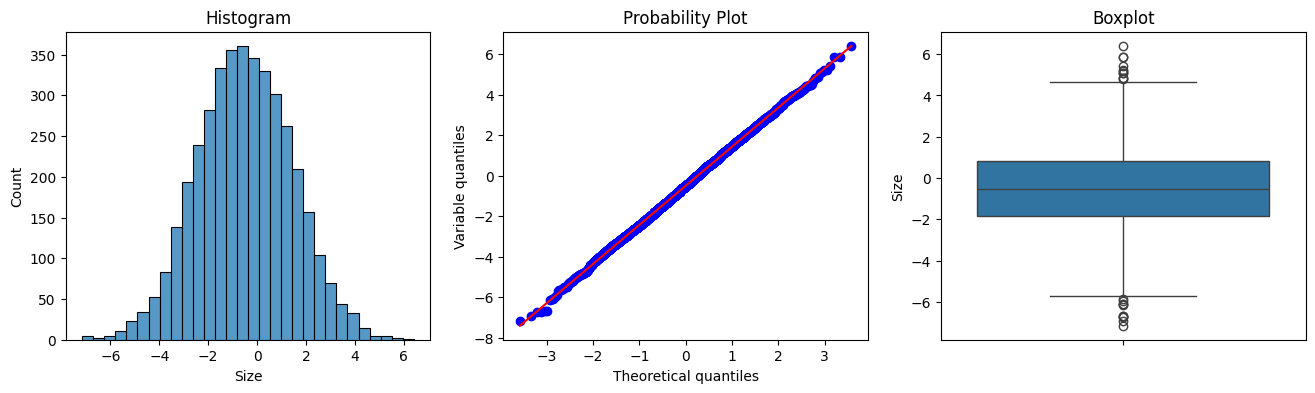

In [ ]:
diagnostic_plots(df, "Size")

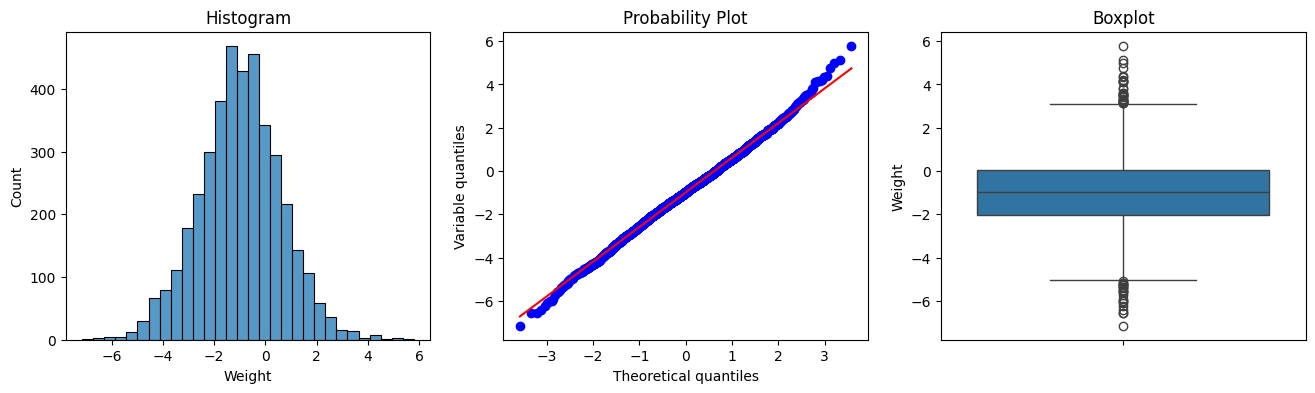

In [ ]:
diagnostic_plots(df, "Weight")

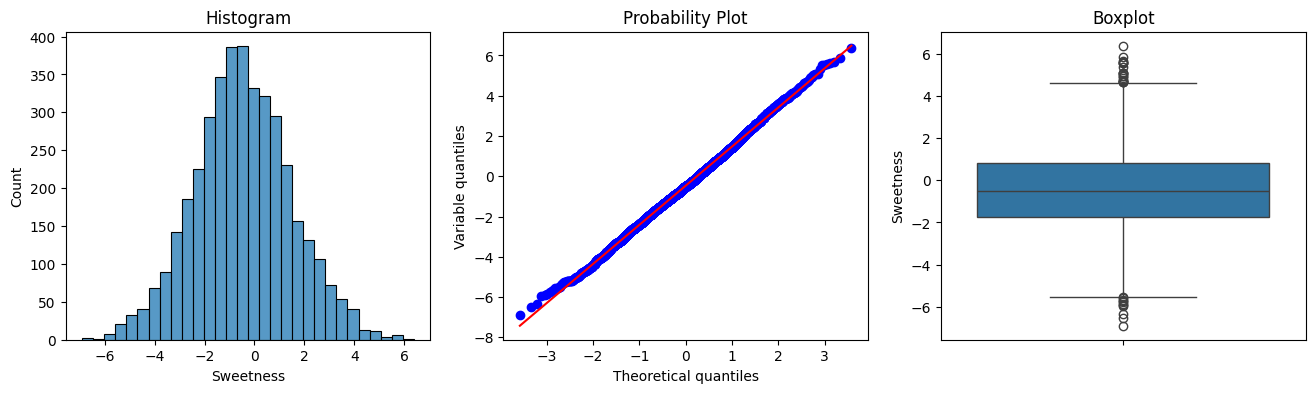

In [ ]:
diagnostic_plots(df, "Sweetness")

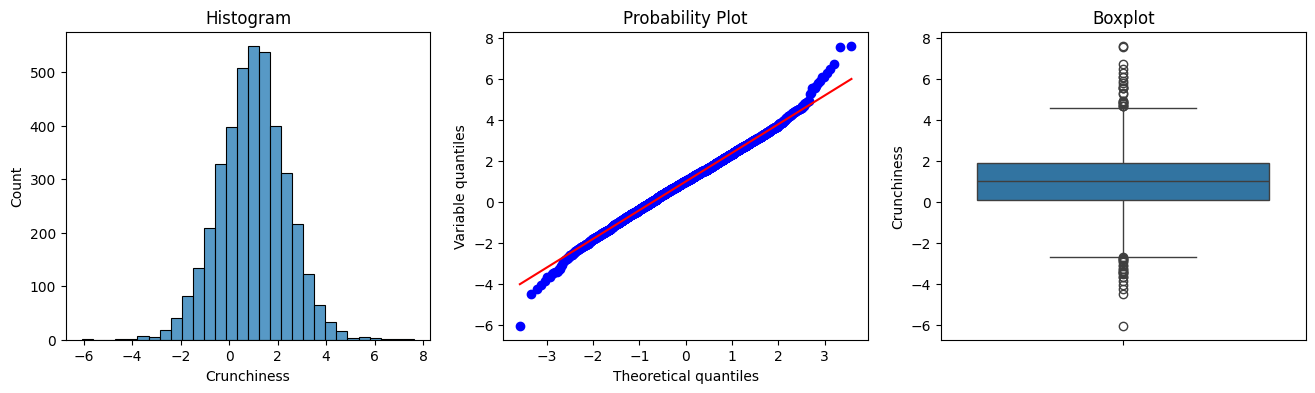

In [ ]:
diagnostic_plots(df, "Crunchiness")

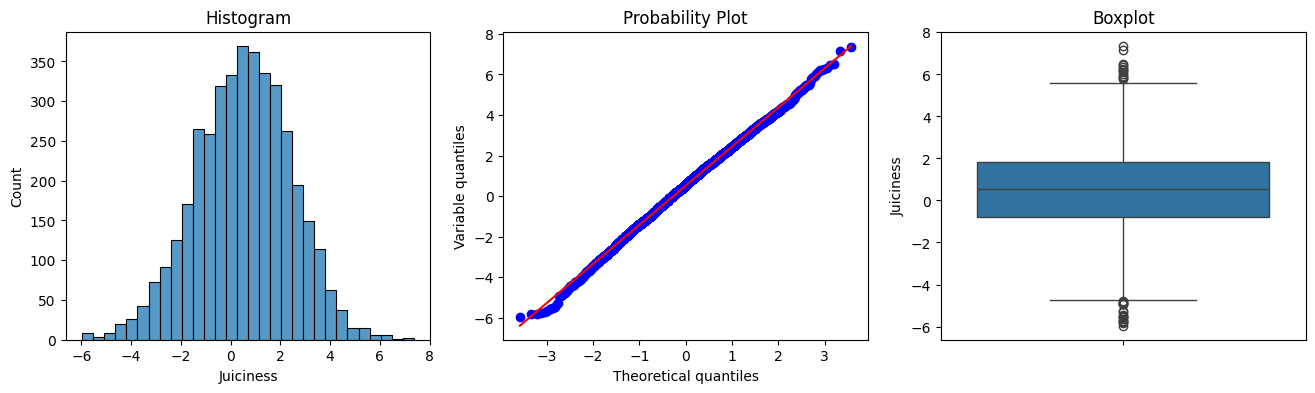

In [ ]:
diagnostic_plots(df, "Juiciness")

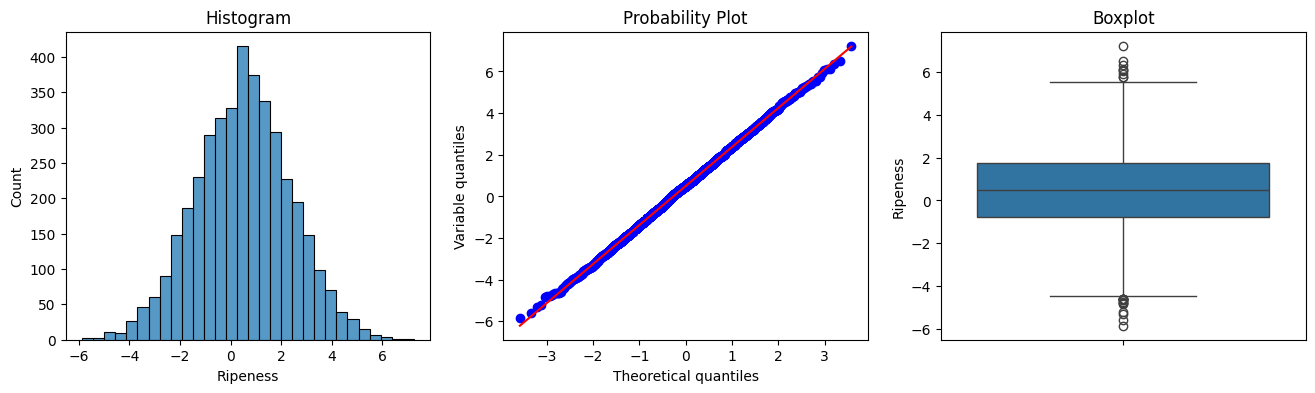

In [ ]:
diagnostic_plots(df, "Ripeness")

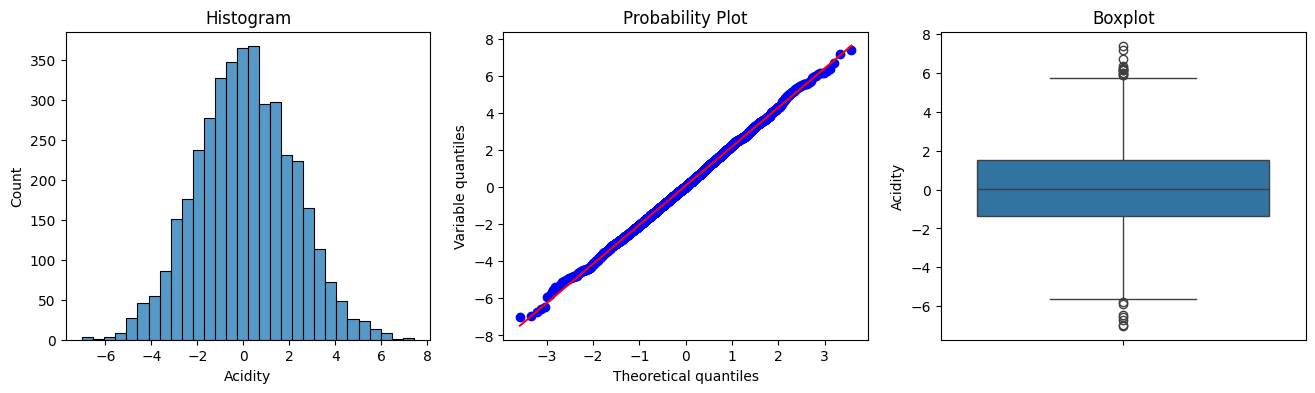

In [ ]:
diagnostic_plots(df, "Acidity")

In [ ]:
def find_skewed_boundaries(df, variable, distance):

    # Let's calculate the boundaries outside which sit the outliers
    # for skewed distributions

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [ ]:
# find limits for Size

size_upper_limit, size_lower_limit = find_skewed_boundaries(df, 'Size', 1.5)
size_upper_limit, size_lower_limit

(4.73896291425, -5.75020099175)

In [ ]:
# let's flag the outliers in the data set

outliers_size = np.where(df['Size'] > size_upper_limit, True,
                       np.where(df['Size'] < size_lower_limit, True, False))

In [ ]:
# let's trimm the dataset

df = df.loc[~outliers_size]

df.shape

(3978, 8)

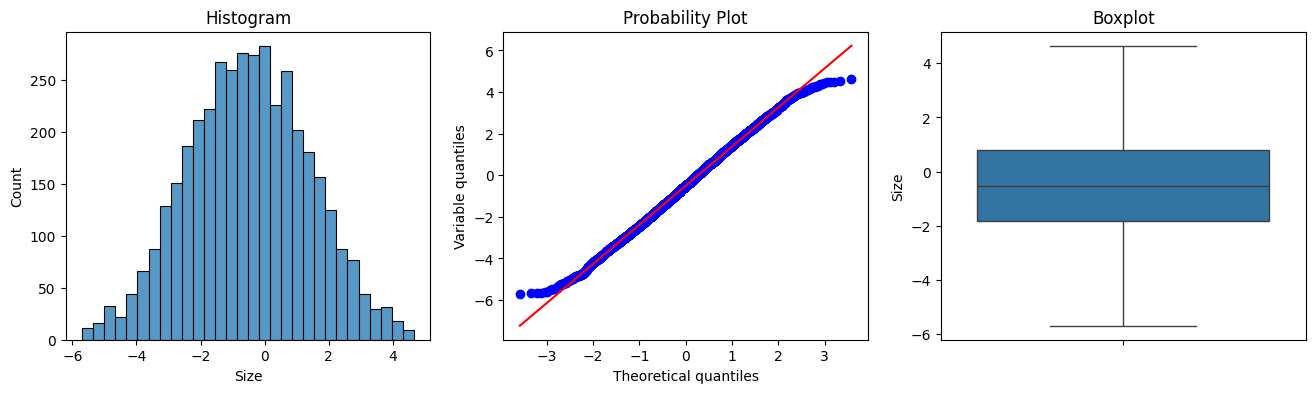

In [ ]:
diagnostic_plots(df, "Size")

In [ ]:
# find limits for Weight

weight_upper_limit, weight_lower_limit = find_skewed_boundaries(df, 'Weight', 1.5)
weight_upper_limit, weight_lower_limit

(3.0851488207499993, -5.067520067249999)

In [ ]:
# let's flag the outliers in the data set

outliers_weight = np.where(df['Weight'] > weight_upper_limit, True,
                       np.where(df['Weight'] < weight_lower_limit, True, False))

In [ ]:
# let's trimm the dataset
df = df.loc[~outliers_weight]

df.shape

(3928, 8)

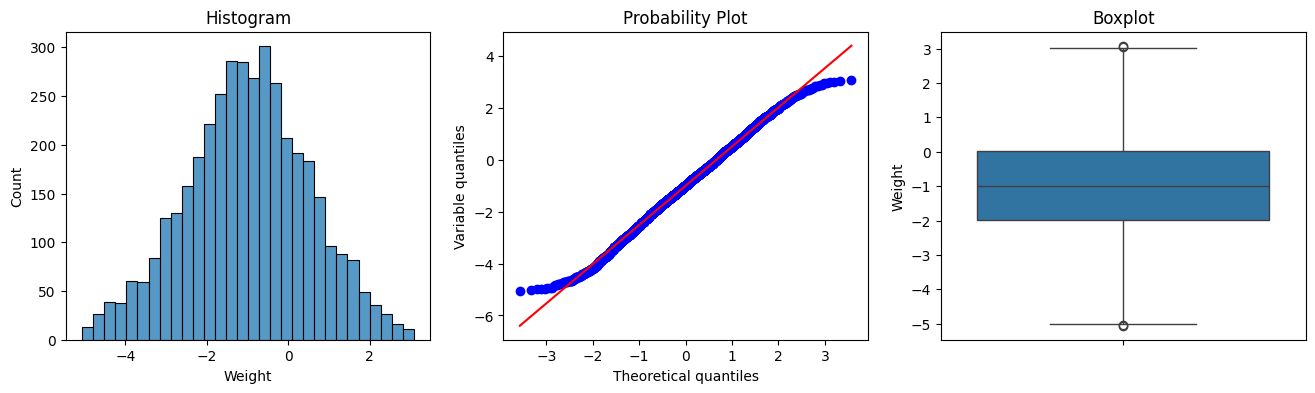

In [ ]:
diagnostic_plots(df, "Weight")

In [ ]:
# find limits for Sweetness

sweetness_upper_limit, sweetness_lower_limit = find_skewed_boundaries(df, 'Sweetness', 1.5)
sweetness_upper_limit, sweetness_lower_limit

(4.621633909375, -5.554460445625)

In [ ]:
# let's flag the outliers in the data set

outliers_sweetness = np.where(df['Sweetness'] > sweetness_upper_limit, True,
                       np.where(df['Sweetness'] < sweetness_lower_limit, True, False))

In [ ]:
# let's trimm the dataset
df = df.loc[~outliers_sweetness]

df.shape

(3899, 8)

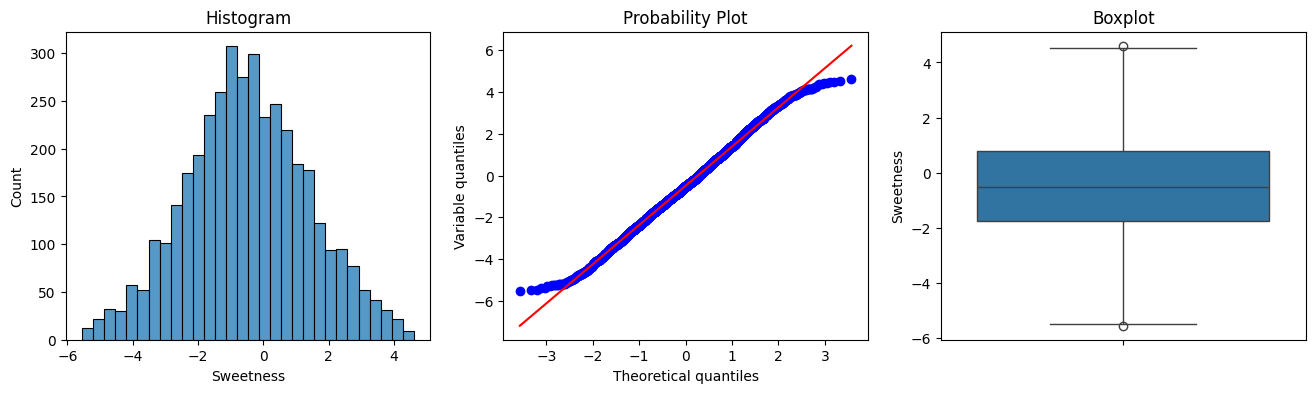

In [ ]:
diagnostic_plots(df, "Sweetness")

In [ ]:
# find limits for Crunchiness

crunchiness_upper_limit, crunchiness_lower_limit = find_skewed_boundaries(df, 'Crunchiness', 1.49)
crunchiness_upper_limit, crunchiness_lower_limit

(4.59592288166, -2.62533194166)

In [ ]:
# let's flag the outliers in the data set

outliers_crunchiness = np.where(df['Crunchiness'] > crunchiness_upper_limit, True,
                       np.where(df['Crunchiness'] < crunchiness_lower_limit, True, False))

In [ ]:
# let's trimm the dataset
df = df.loc[~outliers_crunchiness]

df.shape

(3852, 8)

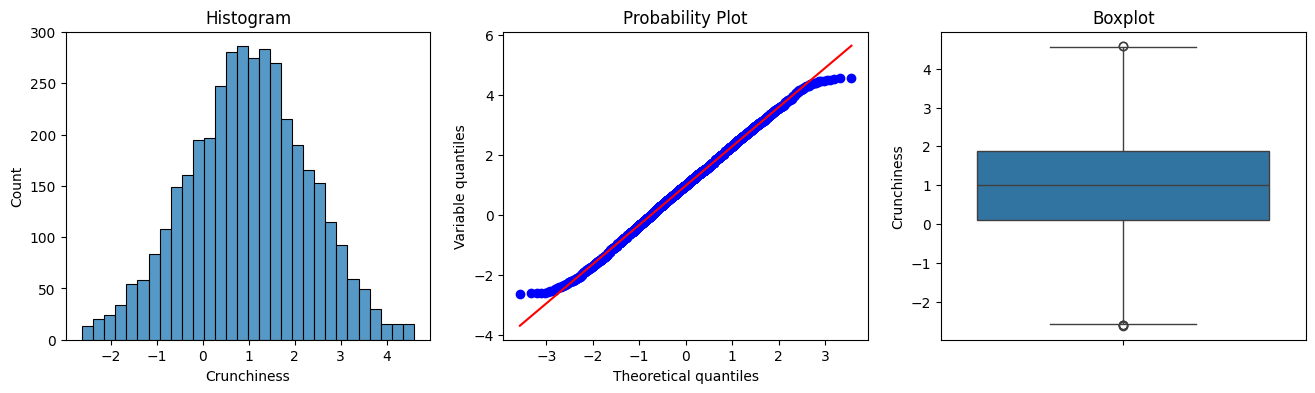

In [ ]:
diagnostic_plots(df, "Crunchiness")

In [ ]:
# find limits for Juiciness

juiciness_upper_limit, juiciness_lower_limit = find_skewed_boundaries(df, 'Juiciness', 1.5)
juiciness_upper_limit, juiciness_lower_limit

(5.702389070875, -4.705593286125)

In [ ]:
# let's flag the outliers in the data set

outliers_juiciness = np.where(df['Juiciness'] > juiciness_upper_limit, True,
                       np.where(df['Juiciness'] < juiciness_lower_limit, True, False))

In [ ]:
# let's trimm the dataset
df = df.loc[~outliers_juiciness]

df.shape

(3825, 8)

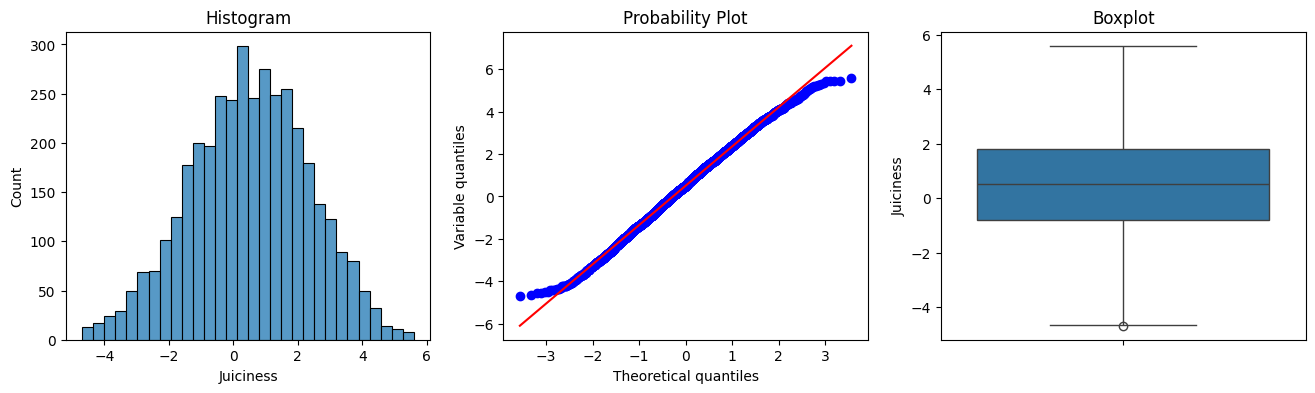

In [ ]:
diagnostic_plots(df, "Juiciness")

In [ ]:
# find limits for Ripeness

ripeness_upper_limit, ripeness_lower_limit = find_skewed_boundaries(df, 'Ripeness', 1.5)
ripeness_upper_limit, ripeness_lower_limit

(5.53213562, -4.47645986)

In [ ]:
# let's flag the outliers in the data set

outliers_ripeness = np.where(df['Ripeness'] > ripeness_upper_limit, True,
                       np.where(df['Ripeness'] < ripeness_lower_limit, True, False))

In [ ]:
# let's trimm the dataset
df = df.loc[~outliers_ripeness]

df.shape

(3803, 8)

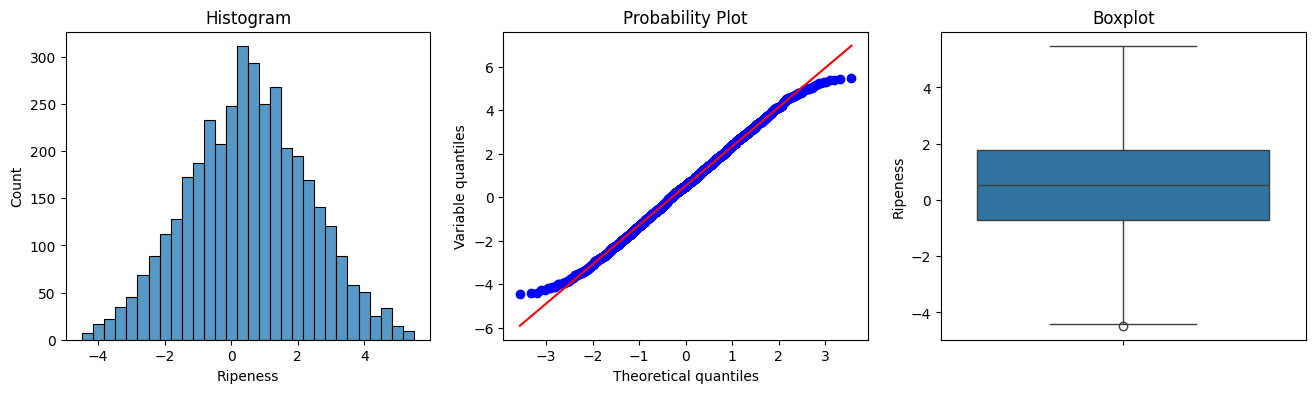

In [ ]:
diagnostic_plots(df, "Ripeness")

In [ ]:
# find limits for Acidity

acidity_upper_limit, acidity_lower_limit = find_skewed_boundaries(df, 'Acidity', 1.5)
acidity_upper_limit, acidity_lower_limit

(5.772366228, -5.660741664)

In [ ]:
# let's flag the outliers in the data set

outliers_acidity = np.where(df['Acidity'] > acidity_upper_limit, True,
                       np.where(df['Acidity'] < acidity_lower_limit, True, False))

In [ ]:
# let's trimm the dataset
df = df.loc[~outliers_acidity]

df.shape

(3786, 8)

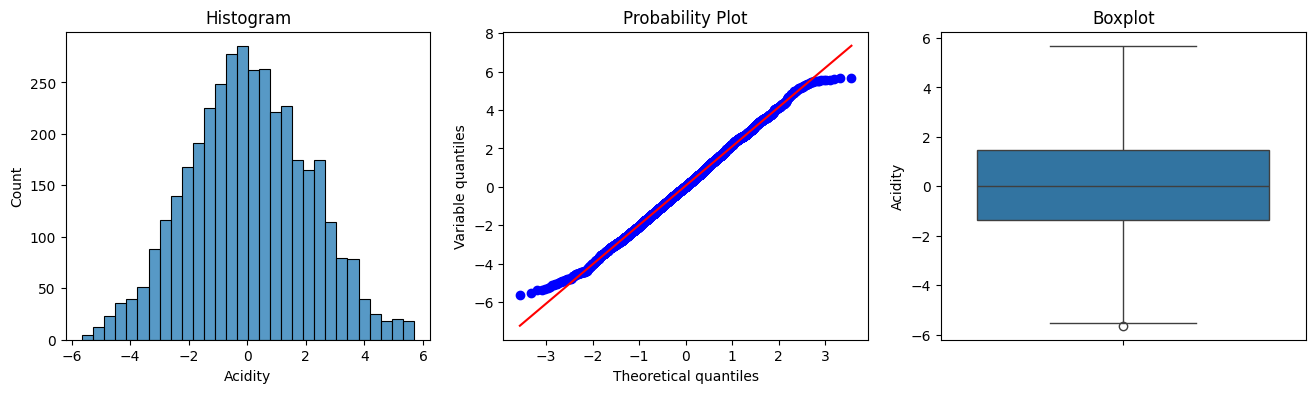

In [ ]:
diagnostic_plots(df, "Acidity")

# <span style="color:purple">EDA </span>

In [ ]:
# # Function to Plot Single Pie and Bar Plot
def single_plot_distribution(column_name, dataframe):
    # Get the value counts of the specified column
    value_counts = dataframe[column_name].value_counts()

    # Set up the figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), gridspec_kw={'width_ratios': [1, 1]})

    # Donut pie chart
    pie_colors = palette[0:3]
    ax1.pie(value_counts, autopct='%0.001f%%', startangle=90, pctdistance=0.85, colors=pie_colors, labels=None)
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    ax1.add_artist(centre_circle)
    ax1.set_title(f'Distribution of {column_name}', fontsize=16)

    # Bar chart
    bar_colors = palette[0:3]
    sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax2, palette=bar_colors,)
    ax2.set_title(f'Count of {column_name}', fontsize=16)
    ax2.set_xlabel(column_name, fontsize=14)
    ax2.set_ylabel('Count', fontsize=14)

    # Rotate x-axis labels for better readability
    ax2.tick_params(axis='x', rotation=45)

    # Show the plots
    plt.tight_layout()
    plt.show()

In [ ]:
# Scatter Plot to Show Realationship Bw 2 Cols
def advanced_scatter_plot(x_column, y_column, target_column, dataframe):
    plt.figure(figsize=(15, 6))
    sns.scatterplot(x=x_column, y=y_column, hue=target_column, data=dataframe, palette=palette[0:3])
    plt.title(f'Scatter Plot of {x_column} vs {y_column} Hue by {target_column}', fontsize=16)
    plt.xlabel(x_column, fontsize=14)
    plt.ylabel(y_column, fontsize=14)
    plt.legend(title=target_column)
    plt.grid(True)
    plt.show()

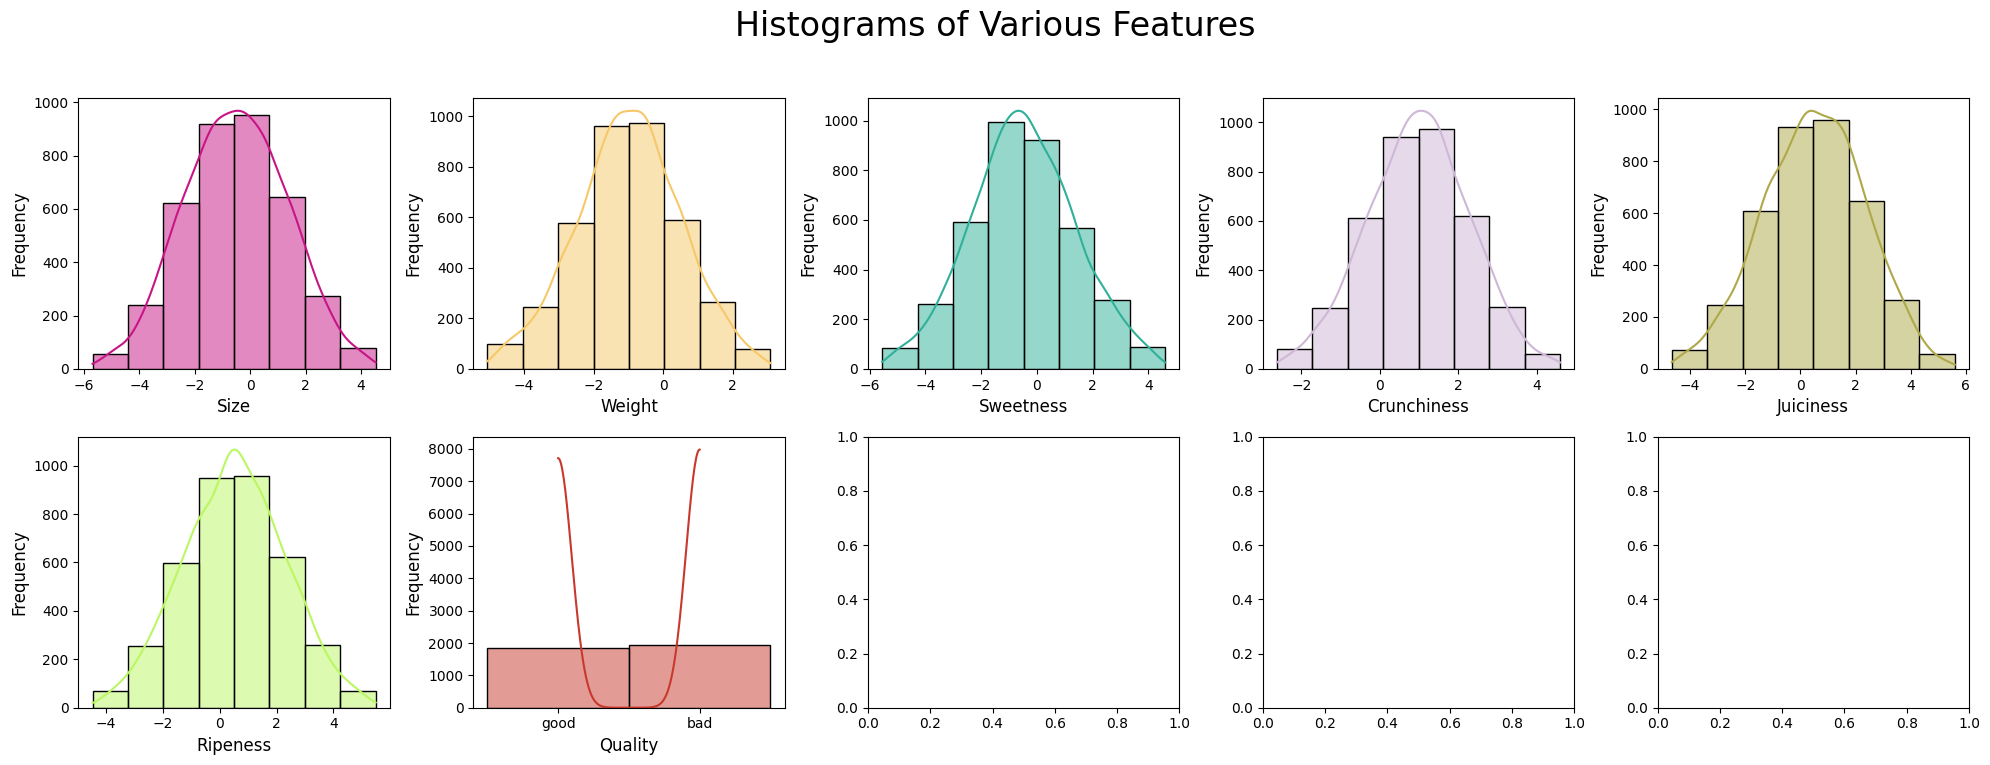

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from random import randint

selected_cols = [col for col in df.columns if col not in ['Acidity']]

colors = ['mediumvioletred']
for i in range(len(selected_cols)):
    colors.append('#%06X' % randint(0, 0xFFFFFF))

num_subplots = len(selected_cols)
num_rows = (num_subplots - 1) // 5 + 1
num_cols = min(5, num_subplots)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 4), facecolor='white')
fig.suptitle("Histograms of Various Features", size=24)

for i in range(num_rows):
    for j in range(num_cols):
        idx = i * num_cols + j
        if idx < num_subplots:
            sns.histplot(df[selected_cols[idx]], ax=axes[i, j], color=colors[idx], kde=True, bins=8)
            axes[i, j].set_xlabel(selected_cols[idx], fontsize=12)  # Set x-axis label font size
            axes[i, j].set_ylabel("Frequency", fontsize=12)  # Set y-axis label font size

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

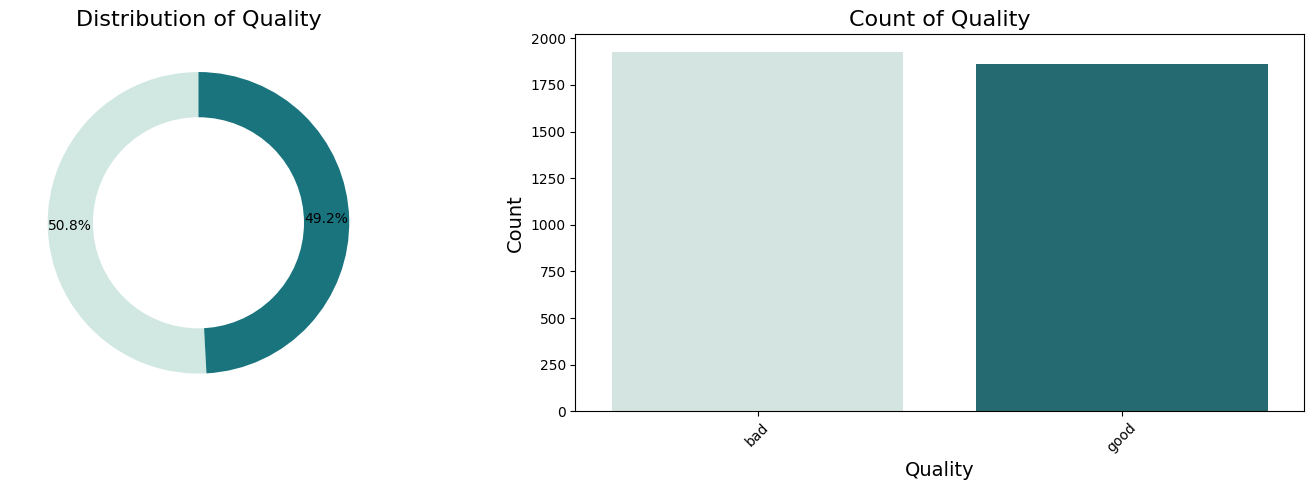

In [ ]:
single_plot_distribution('Quality',df)

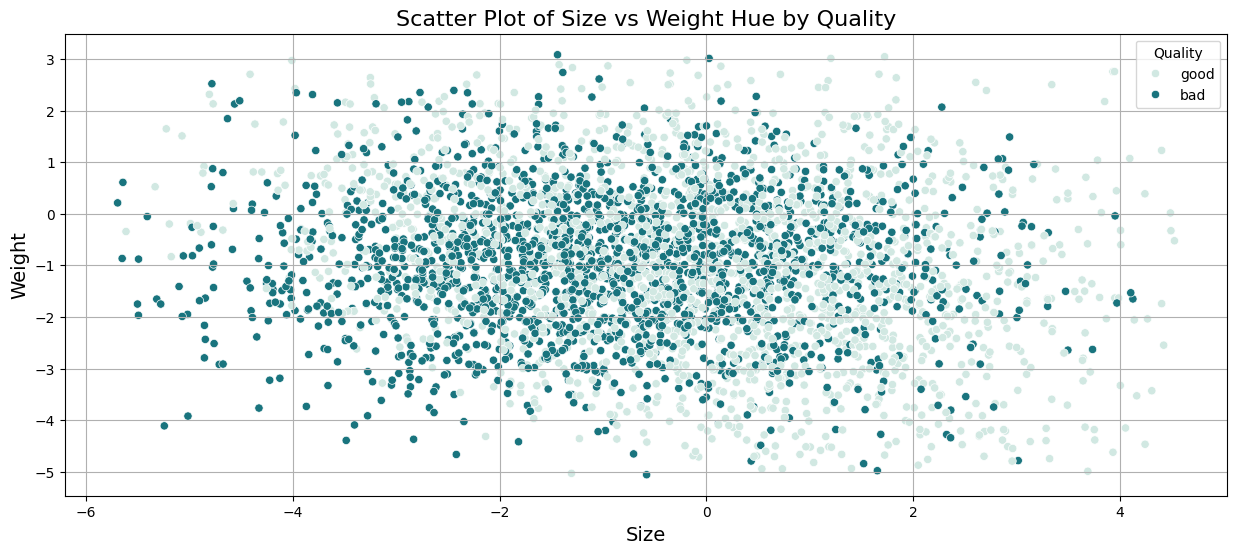

In [ ]:
# Scatter Plot | to Show Size vs Weight RealtionShip
advanced_scatter_plot('Size', 'Weight', 'Quality', df)

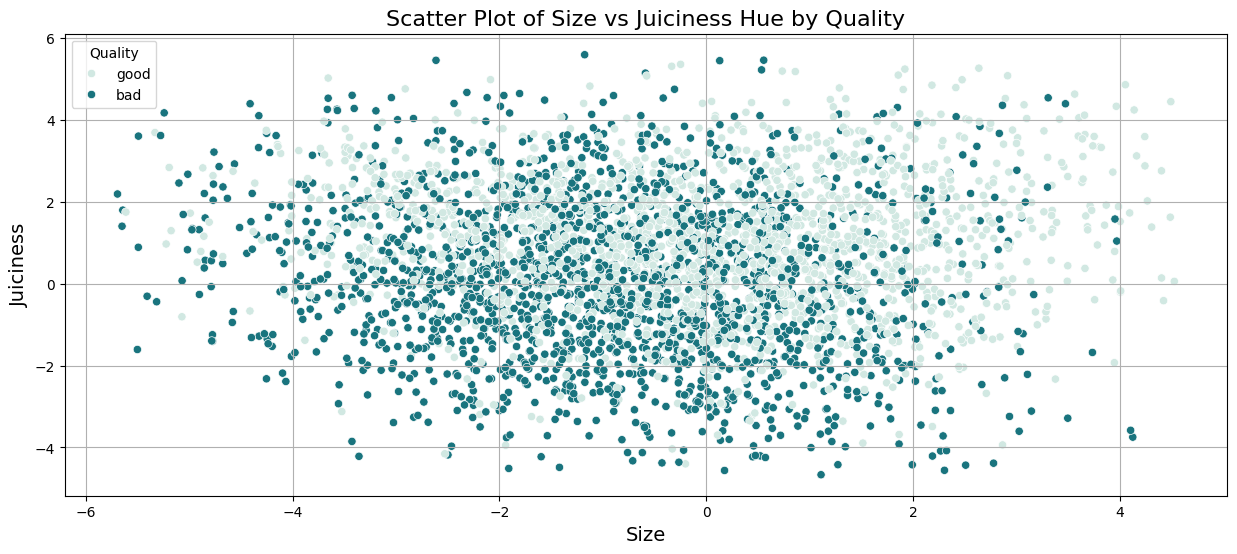

In [ ]:
# Scatter Plot | to Show Size vs Juiciness RealtionShip
advanced_scatter_plot('Size', 'Juiciness', 'Quality', df)

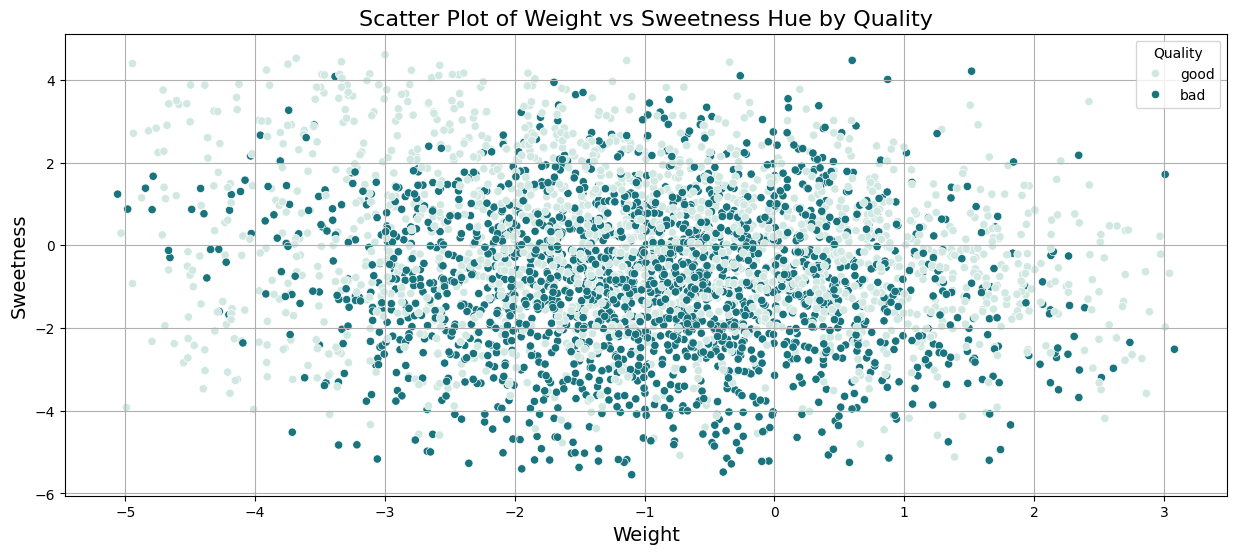

In [ ]:
# # Scatter Plot | to Show Weight vs Sweetness RealtionShip
advanced_scatter_plot('Weight', 'Sweetness', 'Quality', df)

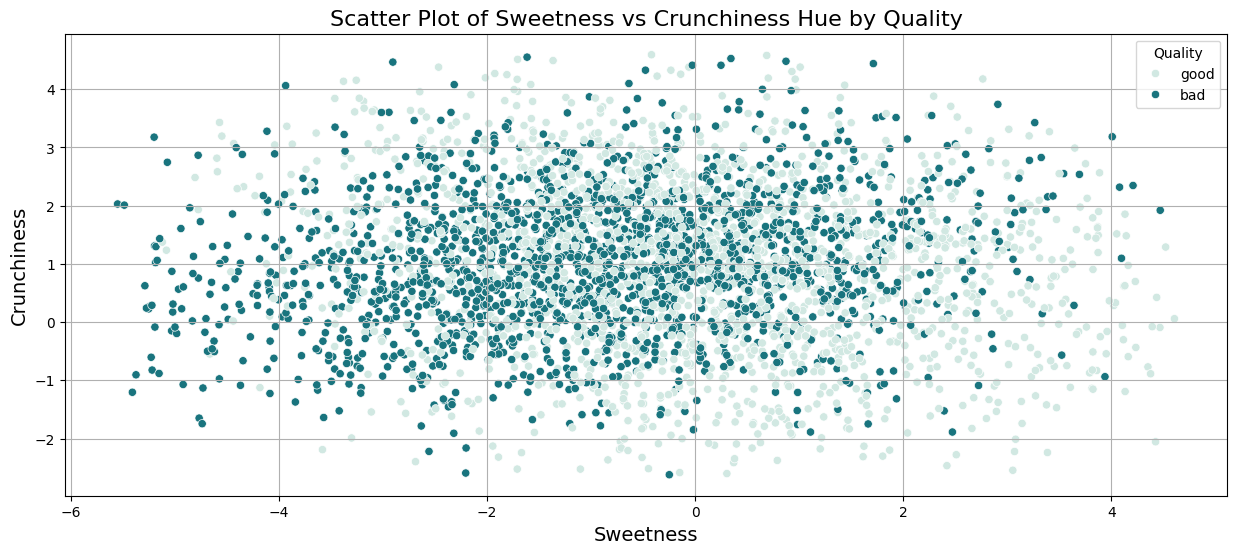

In [ ]:
advanced_scatter_plot('Sweetness', 'Crunchiness', 'Quality', df)

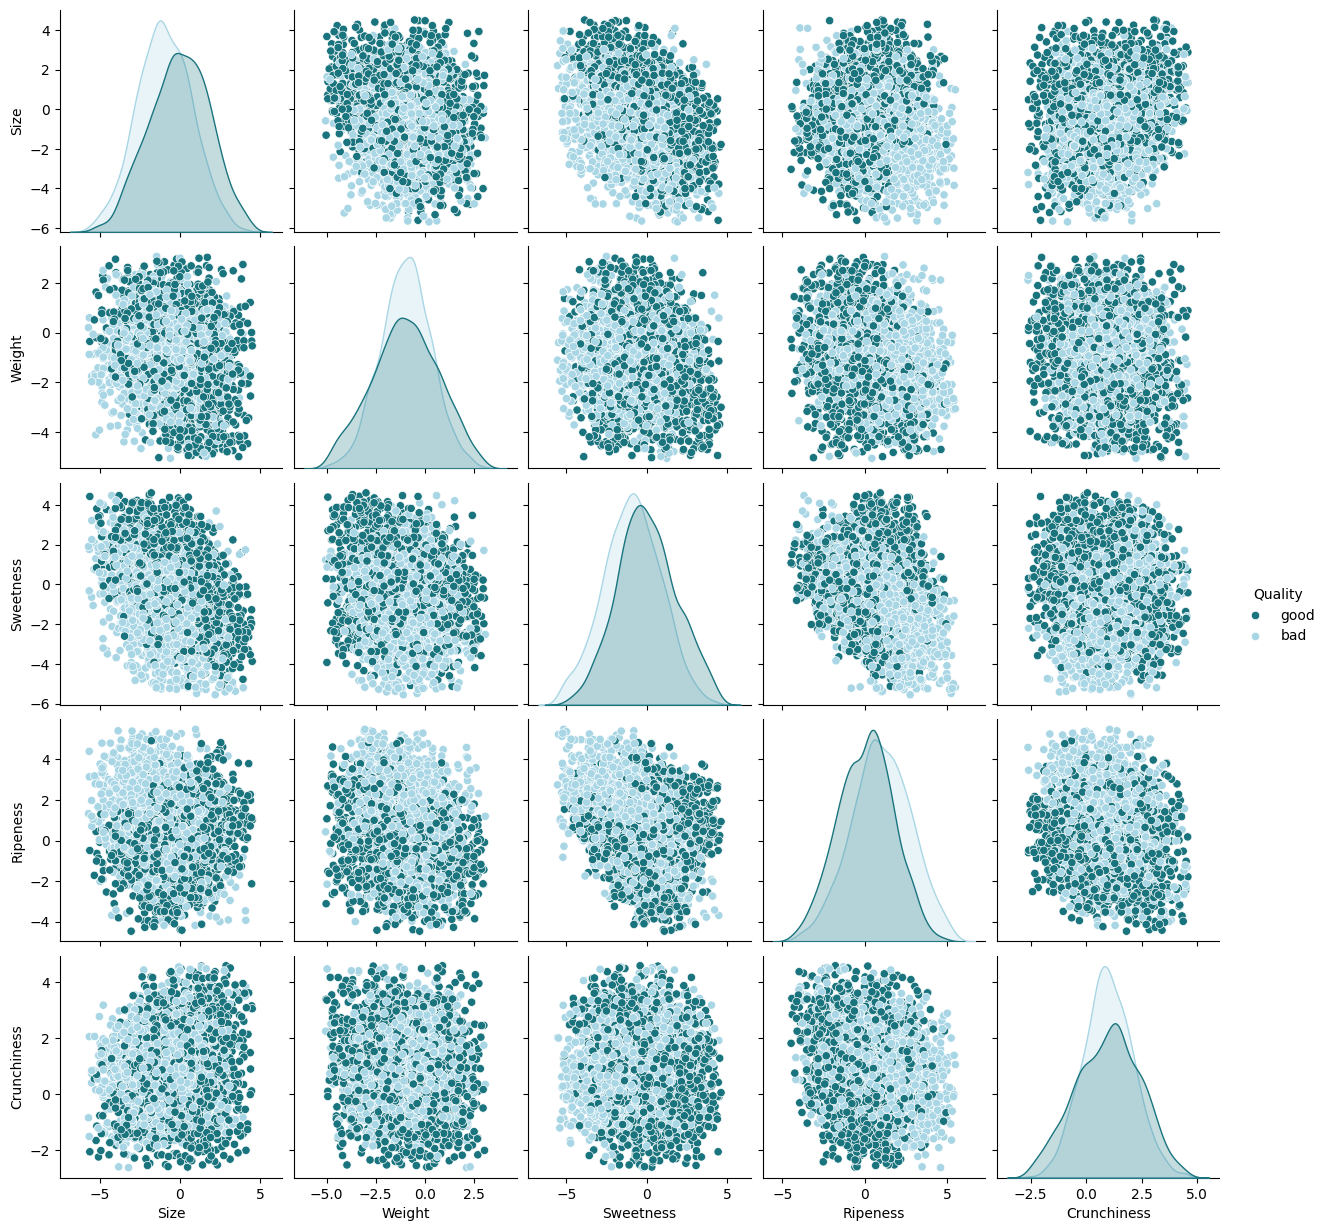

In [ ]:
# Cols to Plot
columns_to_plot = ['Size','Quality', 'Weight', 'Sweetness', 'Ripeness',
                   'Crunchiness',
                   ]

# Data Columns
data_to_plot = df[columns_to_plot]

# Create a dictionary to map colors to unique values of the 'Quality' column
Q_colors = {'good': palette[1], 'bad': palette[2], 'other': 'gray'}

# Creating the pairplot with the specified palette for categorical variables
sns.pairplot(data_to_plot, hue='Quality', palette=Q_colors)
plt.show()

# Replace all categorical data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3786 entries, 1 to 3999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         3786 non-null   float64
 1   Weight       3786 non-null   float64
 2   Sweetness    3786 non-null   float64
 3   Crunchiness  3786 non-null   float64
 4   Juiciness    3786 non-null   float64
 5   Ripeness     3786 non-null   float64
 6   Acidity      3786 non-null   float64
 7   Quality      3786 non-null   object 
dtypes: float64(7), object(1)
memory usage: 266.2+ KB


In [ ]:
df['Quality'].unique()

array(['good', 'bad'], dtype=object)

In [ ]:
encoded_df = df

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
encoded_df['Quality'] = label_encoder.fit_transform(encoded_df['Quality'])

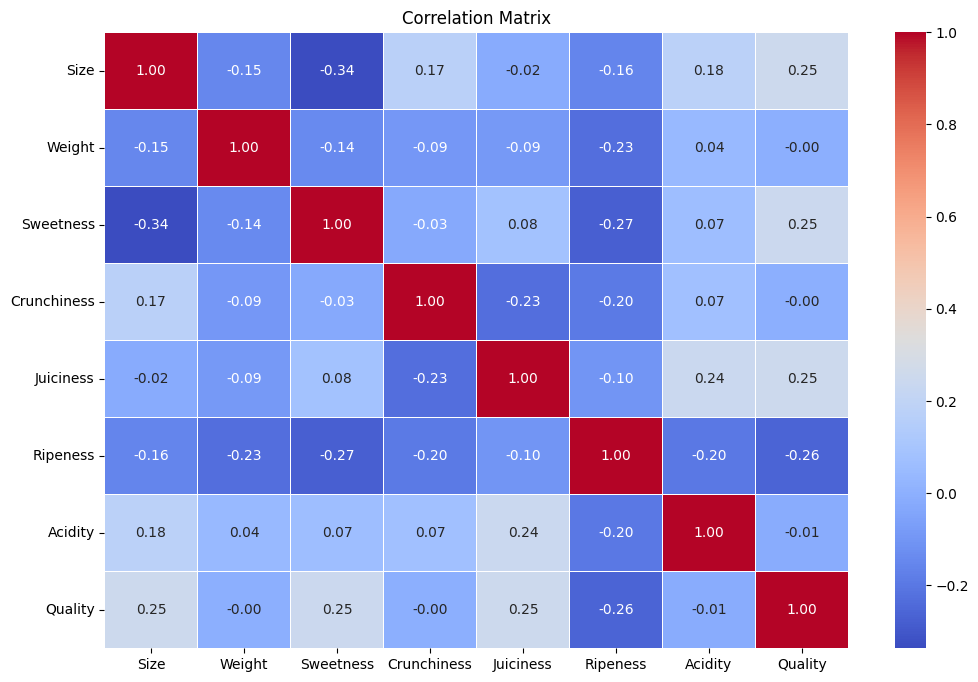

In [ ]:
correlation_matrix = encoded_df.corr()

# Побудувати теплокарту матриці кореляції
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Quality'] = label_encoder.fit_transform(df['Quality'])

In [ ]:
df.head()

Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness   Acidity  \
1 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530 -0.722809   
2 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033  2.621636   
3 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761  0.790723   
4  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849  0.501984   
5 -3.425400 -1.409082  -1.913511    -0.555775  -3.853071  1.914616 -2.981523   

   Quality  
1        1  
2        0  
3        1  
4        1  
5        0

# Scaling data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3786 entries, 1 to 3999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         3786 non-null   float64
 1   Weight       3786 non-null   float64
 2   Sweetness    3786 non-null   float64
 3   Crunchiness  3786 non-null   float64
 4   Juiciness    3786 non-null   float64
 5   Ripeness     3786 non-null   float64
 6   Acidity      3786 non-null   float64
 7   Quality      3786 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 266.2 KB


In [ ]:
# the scaler - for min-max scaling
from sklearn.preprocessing import MinMaxScaler

df[['Size','Weight', 'Sweetness', 'Crunchiness', 'Juiciness',
                 'Ripeness', 'Acidity']].describe()

Size       Weight    Sweetness  Crunchiness    Juiciness  \
count  3786.000000  3786.000000  3786.000000  3786.000000  3786.000000   
mean     -0.510341    -0.986935    -0.478651     0.985697     0.500146   
std       1.850207     1.497316     1.871786     1.297315     1.849076   
min      -5.692093    -5.058679    -5.548641    -2.620954    -4.667150   
25%      -1.796627    -1.967852    -1.724304     0.094724    -0.793372   
50%      -0.514404    -0.979316    -0.504758     0.996911     0.509758   
75%       0.769200     0.010353     0.777221     1.874618     1.786527   
max       4.524772     3.081538     4.606386     4.591936     5.598023   

          Ripeness      Acidity  
count  3786.000000  3786.000000  
mean      0.526871     0.059527  
std       1.800784     2.046333  
min      -4.471210    -5.634195  
25%      -0.707739    -1.371829  
50%       0.527629     0.014862  
75%       1.768073     1.465006  
max       5.484760     5.685253

In [ ]:
# set up the scaler
scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(df[['Size','Weight', 'Sweetness', 'Crunchiness', 'Juiciness',
                 'Ripeness', 'Acidity']])

# transform train and test sets
X_train_scaled = scaler.transform(df[['Size','Weight', 'Sweetness', 'Crunchiness', 'Juiciness',
                 'Ripeness', 'Acidity']])

In [ ]:
# the scaler stores the maximum values of the features, learned from train set
scaler.data_max_

array([4.52477154, 3.08153777, 4.60638586, 4.59193582, 5.5980234 ,
       5.4847599 , 5.68525293])

In [ ]:
# tthe scaler stores the minimum values of the features, learned from train set
scaler.min_

array([0.5571272 , 0.62144281, 0.54639354, 0.36337088, 0.45465867,
       0.44909841, 0.49774469])

In [ ]:
# the scaler also stores the value range (max -  min)

scaler.data_range_

array([10.21686492,  8.14021721, 10.15502691,  7.21288998, 10.26517348,
        9.95597034, 11.31944808])

In [ ]:
# let's transform the returned NumPy arrays to dataframes for the rest of
# the demo
X_train = df[['Size','Weight', 'Sweetness', 'Crunchiness', 'Juiciness',
                 'Ripeness', 'Acidity']]
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled.describe()

Size       Weight    Sweetness  Crunchiness    Juiciness  \
count  3786.000000  3786.000000  3786.000000  3786.000000  3786.000000   
mean      0.507176     0.500201     0.499259     0.500029     0.503381   
std       0.181093     0.183941     0.184321     0.179861     0.180131   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.381278     0.379698     0.376595     0.376504     0.377371   
50%       0.506779     0.501137     0.496688     0.501583     0.504318   
75%       0.632414     0.622715     0.622929     0.623269     0.628696   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

          Ripeness      Acidity  
count  3786.000000  3786.000000  
mean      0.502019     0.503004  
std       0.180875     0.180780  
min       0.000000     0.000000  
25%       0.378012     0.376552  
50%       0.502095     0.499058  
75%       0.626688     0.627169  
max       1.000000     1.000000

In [ ]:
# let's have a look at the original training dataset: min and max values
# I use np.round to reduce the number of decimals to 1.

np.round(X_train_scaled.describe(), 1)

Size  Weight  Sweetness  Crunchiness  Juiciness  Ripeness  Acidity
count  3786.0  3786.0     3786.0       3786.0     3786.0    3786.0   3786.0
mean      0.5     0.5        0.5          0.5        0.5       0.5      0.5
std       0.2     0.2        0.2          0.2        0.2       0.2      0.2
min       0.0     0.0        0.0          0.0        0.0       0.0      0.0
25%       0.4     0.4        0.4          0.4        0.4       0.4      0.4
50%       0.5     0.5        0.5          0.5        0.5       0.5      0.5
75%       0.6     0.6        0.6          0.6        0.6       0.6      0.6
max       1.0     1.0        1.0          1.0        1.0       1.0      1.0

In [ ]:
df.reset_index(drop=True, inplace=True)
X_train_scaled.reset_index(drop=True, inplace=True)

In [ ]:
df[['Size','Weight', 'Sweetness', 'Crunchiness', 'Juiciness',
                 'Ripeness', 'Acidity']] = X_train_scaled

# Determining and training the best model

### Preparing data for the model

In [ ]:
duplicates = df.duplicated()
num_duplicates = duplicates.sum()
print(num_duplicates)

0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3786 entries, 0 to 3785
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         3786 non-null   float64
 1   Weight       3786 non-null   float64
 2   Sweetness    3786 non-null   float64
 3   Crunchiness  3786 non-null   float64
 4   Juiciness    3786 non-null   float64
 5   Ripeness     3786 non-null   float64
 6   Acidity      3786 non-null   float64
 7   Quality      3786 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 236.8 KB


In [ ]:
df = df.drop_duplicates()

import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame containing the data
# Drop duplicates
df = df.drop_duplicates()

# Define features (X) and target (y)
X = df[['Size','Weight', 'Sweetness', 'Crunchiness', 'Juiciness',
                 'Ripeness', 'Acidity']]

y = df['Quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Determining the best model

In [ ]:
import time
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split  # Add this line

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Instantiate the models
logistic_regression = LogisticRegression()
svc = SVC()
naive_bayes = GaussianNB()
sgd_classifier = SGDClassifier()
knn_classifier = KNeighborsClassifier()
decision_tree_classifier = DecisionTreeClassifier()
random_forest_classifier = RandomForestClassifier()
gradient_boosting_classifier = GradientBoostingClassifier()

algo = [logistic_regression, svc, naive_bayes, sgd_classifier, knn_classifier, decision_tree_classifier,
        random_forest_classifier]

result = []

for i in algo:
    start = time.process_time()
    ml_model = i.fit(X_train, y_train)
    result.append([str(i).split("(")[0] + str("_baseline"), ml_model.score(X_train, y_train),
                   ml_model.score(X_test, y_test),
                   np.sqrt(mean_squared_error(y_train, ml_model.predict(X_train))),
                   np.sqrt(mean_squared_error(y_test, ml_model.predict(X_test))),
                   mean_absolute_error(y_train, ml_model.predict(X_train)),
                   mean_absolute_error(y_test, ml_model.predict(X_test))])
    print(str(i).split("(")[0], "✓    ", "{}".format(round(time.process_time() - start, 3)), "sec")

result = pd.DataFrame(result, columns=["Algorithm", "Train_Score", "Test_Score", "Train_Rmse",
                                        "Test_Rmse", "Train_Mae", "Test_Mae"]).sort_values("Test_Rmse").set_index(
    "Algorithm")
result

LogisticRegression ✓     0.075 sec
SVC ✓     1.593 sec
GaussianNB ✓     0.02 sec
SGDClassifier ✓     0.043 sec
KNeighborsClassifier ✓     1.21 sec
DecisionTreeClassifier ✓     0.052 sec
RandomForestClassifier ✓     1.097 sec


Train_Score  Test_Score  Train_Rmse  \
Algorithm                                                              
SVC_baseline                        0.897358    0.895246    0.320377   
KNeighborsClassifier_baseline       0.921132    0.889085    0.280834   
RandomForestClassifier_baseline     1.000000    0.875880    0.000000   
DecisionTreeClassifier_baseline     1.000000    0.777289    0.000000   
GaussianNB_baseline                 0.747547    0.757923    0.502447   
SGDClassifier_baseline              0.738491    0.751761    0.511380   
LogisticRegression_baseline         0.741132    0.749120    0.508791   

                                 Test_Rmse  Train_Mae  Test_Mae  
Algorithm                                                        
SVC_baseline                      0.323656   0.102642  0.104754  
KNeighborsClassifier_baseline     0.333040   0.078868  0.110915  
RandomForestClassifier_baseline   0.352306   0.000000  0.124120  
DecisionTreeClassifier_baseline   0.471923   0.000000  0.222711  
GaussianNB_baseline               0.492014   0.252453  0.242077  
SGDClassifier_baseline            0.498236   0.261509  0.248239  
LogisticRegression_baseline       0.500880   0.258868  0.250880

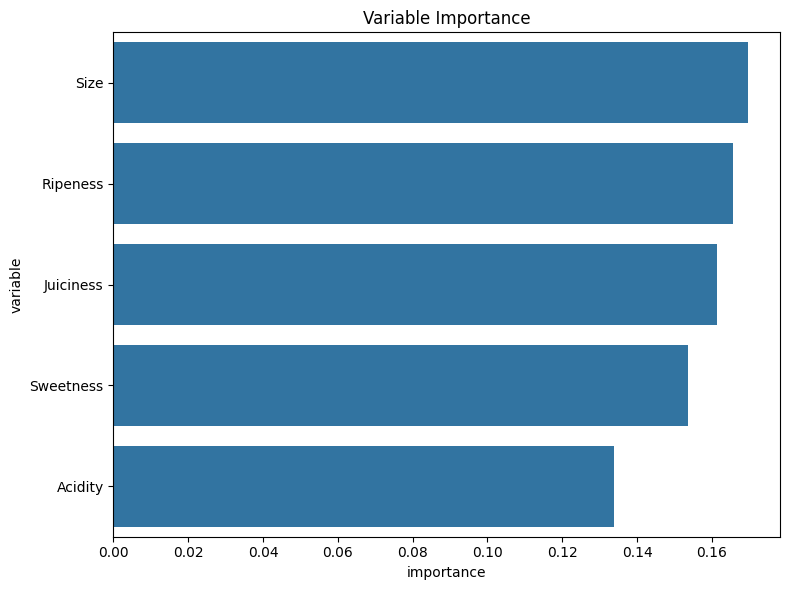

In [ ]:
rankings = ml_model.feature_importances_.tolist()
importance = pd.DataFrame(sorted(zip(X_train.columns,rankings),reverse=True),columns=["variable","importance"]).sort_values("importance",ascending = False)

plt.figure(figsize=(8,6))
sns.barplot(x="importance",
            y="variable",
            data=importance[:5])
plt.title('Variable Importance')
plt.tight_layout()

## Cross Validation

k-fold set metrics:                precision    recall  f1-score   support

           0       0.90      0.87      0.89       346
           1       0.86      0.90      0.88       317

    accuracy                           0.88       663
   macro avg       0.88      0.88      0.88       663
weighted avg       0.88      0.88      0.88       663

k-fold set metrics:                precision    recall  f1-score   support

           0       0.89      0.87      0.88       324
           1       0.88      0.90      0.89       339

    accuracy                           0.88       663
   macro avg       0.88      0.88      0.88       663
weighted avg       0.88      0.88      0.88       663

k-fold set metrics:                precision    recall  f1-score   support

           0       0.88      0.89      0.88       323
           1       0.89      0.88      0.89       339

    accuracy                           0.88       662
   macro avg       0.88      0.88      0.88       662
weighted av

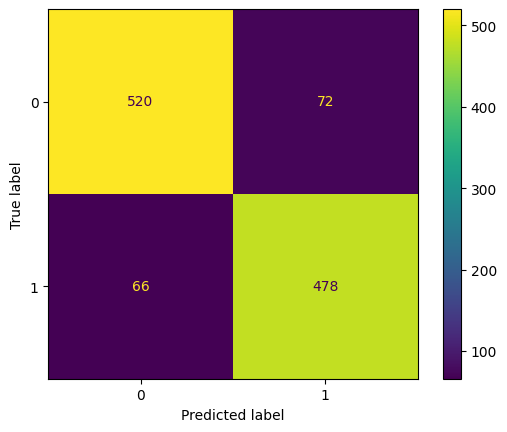

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn import metrics

# prepare cross validation
kfold = KFold(n_splits=4, shuffle=True, random_state=43)
# enumerate splits
for train, test in kfold.split(X_train):
    classifier = SVC()
    classifier.fit(X_train.iloc[train], y_train.iloc[train])
    y_pred = classifier.predict(X_train.iloc[test])
    print('k-fold set metrics: ', metrics.classification_report(y_train.iloc[test], y_pred))

y_pred = classifier.predict(X_test)
print('test set metrics: ', metrics.classification_report(y_test, y_pred))
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot()

ShuffleSplit set metrics:                precision    recall  f1-score   support

           0       0.89      0.88      0.89       410
           1       0.88      0.88      0.88       385

    accuracy                           0.88       795
   macro avg       0.88      0.88      0.88       795
weighted avg       0.88      0.88      0.88       795

ShuffleSplit set metrics:                precision    recall  f1-score   support

           0       0.86      0.89      0.88       378
           1       0.90      0.87      0.88       417

    accuracy                           0.88       795
   macro avg       0.88      0.88      0.88       795
weighted avg       0.88      0.88      0.88       795

ShuffleSplit set metrics:                precision    recall  f1-score   support

           0       0.88      0.89      0.88       401
           1       0.88      0.87      0.88       394

    accuracy                           0.88       795
   macro avg       0.88      0.88      0.88    

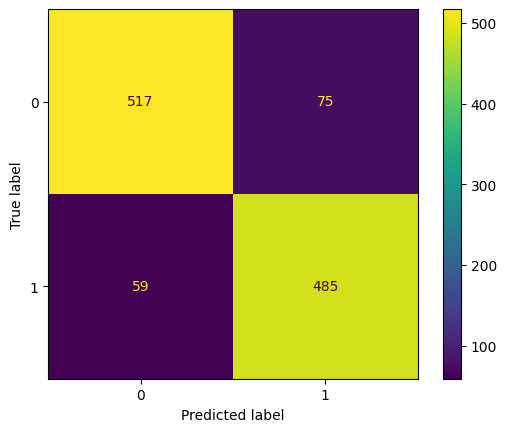

In [ ]:
from sklearn.model_selection import ShuffleSplit

ss = ShuffleSplit(n_splits=4, test_size=0.3, random_state=40)
for train_index, test_index in ss.split(X_train):
    classifier.fit(X_train.iloc[train_index], y_train.iloc[train_index])
    y_pred = classifier.predict(X_train.iloc[test_index])
    print('ShuffleSplit set metrics: ', metrics.classification_report(y_train.iloc[test_index], y_pred))

y_pred = classifier.predict(X_test)
print('test set metrics: ', metrics.classification_report(y_test, y_pred))
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot()

#### Determining the best hyperparameters

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

ss = ShuffleSplit(n_splits=4, test_size=0.3, random_state=40)

# Create the random grid
param_grid = {
    'C': [0.1, 1, 10],             # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel type
    'gamma': ['scale', 1, 0.1, 0.01],  # Kernel coefficient
    'degree': [2, 3],               # Degree of polynomial kernel function ('poly')
    'coef0': [0.0],                    # Independent term in the polynomial and sigmoid kernels
    'shrinking': [True, False],        # Whether to use the shrinking heuristic
    'probability': [False],            # Whether to enable probability estimates
    'tol': [1e-3],                     # Tolerance for stopping criterion
    'cache_size': [200],               # Size of the kernel cache (in MB)
    'class_weight': [None],            # Weights associated with classes
}

svc = SVC()

grid = GridSearchCV(estimator=svc,
                    param_grid=param_grid,
                    scoring='accuracy',
                    cv=ss,
                    verbose=3,
                    return_train_score=True)

grid.fit(X_train, y_train)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

Fitting 4 folds for each of 144 candidates, totalling 576 fits
[CV 1/4] END C=0.1, cache_size=200, class_weight=None, coef0=0.0, degree=2, gamma=scale, kernel=linear, probability=False, shrinking=True, tol=0.001;, score=(train=0.746, test=0.709) total time=   0.1s
[CV 2/4] END C=0.1, cache_size=200, class_weight=None, coef0=0.0, degree=2, gamma=scale, kernel=linear, probability=False, shrinking=True, tol=0.001;, score=(train=0.735, test=0.742) total time=   0.1s
[CV 3/4] END C=0.1, cache_size=200, class_weight=None, coef0=0.0, degree=2, gamma=scale, kernel=linear, probability=False, shrinking=True, tol=0.001;, score=(train=0.742, test=0.738) total time=   0.1s
[CV 4/4] END C=0.1, cache_size=200, class_weight=None, coef0=0.0, degree=2, gamma=scale, kernel=linear, probability=False, shrinking=True, tol=0.001;, score=(train=0.747, test=0.723) total time=   0.1s
[CV 1/4] END C=0.1, cache_size=200, class_weight=None, coef0=0.0, degree=2, gamma=scale, kernel=linear, probability=False, shrink

In [ ]:
from sklearn.metrics import mean_squared_error

# Встановіть параметри моделі з наданими найкращими параметрами
best_params = {'C': 10, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf', 'probability': False, 'shrinking': True, 'tol': 0.001}
svc_model = SVC(**best_params)

# Тренуємо модель на навчальних даних
svc_model.fit(X_train, y_train)

# Зробіть прогнози на тестових даних
y_pred = svc_model.predict(X_test)

# Обчисліть середньоквадратичну помилку на тестових даних
test = svc_model.score(X_test, y_test)

# Виведіть результат
print("Test Score:", test)

Test Score: 0.9040492957746479


In [ ]:
# Check if the model is linear
if svc_model.kernel == 'linear':
    # Get the coefficients of the support vectors
    coef = svc_model.coef_
    # Calculate feature importance as the absolute values of the coefficients
    feature_importance = np.abs(coef)
    # Get feature names
    feature_names = X_train.columns
    # Create a DataFrame with feature importance
    feature_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importance.squeeze()})
    # Sort the DataFrame by importance
    feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)
    # Print and visualize feature importance
    print(feature_importance_df)
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance_df["Feature"], feature_importance_df["Importance"])
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.title("Feature Importance")
    plt.show()
else:
    print("Feature importance is not available for non-linear SVC models.")


Feature importance is not available for non-linear SVC models.


In [ ]:
train, new_input = train_test_split(df, test_size=0.1, random_state=42)

# Збереження даних в каталозі
train.to_csv('/content/drive/MyDrive/smart_systems/Coursework/data/script/train.csv', index=False)
new_input.to_csv('/content/drive/MyDrive/smart_systems/Coursework/data/script/new_input.csv', index=False)